<a href="https://colab.research.google.com/github/hemraj4545/Projects/blob/master/GRIP_Tasks/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Explore Supervised Machine Learning
## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
try:
  data = pd.read_csv("http://bit.ly/w-data")
  print("Data Imported!!!")
except:
  print("Data Importing Failed!!!")

Data Imported!!!


In [36]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [37]:
data.shape

(25, 2)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Visualization
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

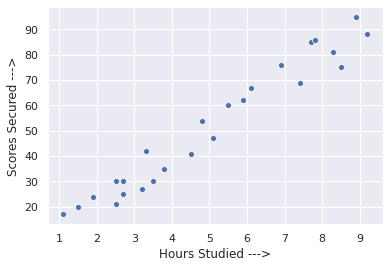

In [39]:
sns.set()

sns.scatterplot(x = "Hours", y = "Scores", data = data)
plt.xlabel("Hours Studied --->")
plt.ylabel("Scores Secured --->")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data
The next step is to divide the data into "features" (inputs) and "labels  (outputs).

In [40]:
features = data.iloc[:, :-1].values
labels = data.iloc[:, 1:].values

Now that we have our features and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,
                                                    test_size=0.3,
                                                    random_state = 0)

# Training the Algorithm
Train our algorithm using the Equation : $y = mx+ c$

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

print("Model Training Completed!!!")

Model Training Completed!!!


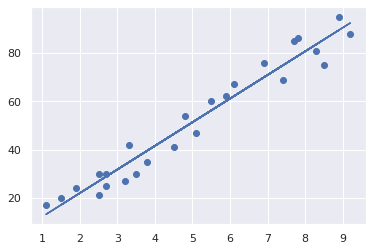

In [68]:
# Plotting the regression line
line = model.coef_*features + model.intercept_

# Plotting for the test data
plt.scatter(features, labels)
plt.plot(features, line);
plt.show()

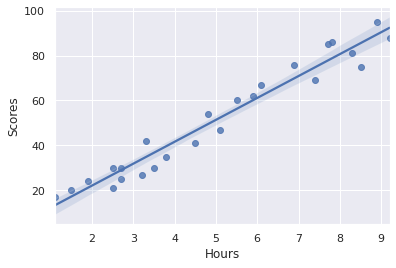

In [69]:
# We can plot the regression plot using seaborn.
sns.regplot(x = "Hours", y = "Scores", data = data)

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [70]:
print(X_test) # Testing data
Y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [71]:
# Creating a Dataframe to compare the predictions
df = pd.DataFrame({'Actual':Y_test.flatten(), 
                   'Predicted':Y_pred.flatten()})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [72]:
# Testing Own Data
hours = 9.25
pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = [92.91505723]


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.

Mean Absolute Error = $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

In [73]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.419727808027651
